In [2]:
import re, os, sys
import maboss

In [3]:
model = maboss.load(
    "../PhysiCell/config/boolean_network/epithelial_cell_2.bnd", 
    "../PhysiCell/config/boolean_network/epithelial_cell_2.cfg"
)

### Drawing the interaction graph

In [4]:
mini_model = maboss.to_minibn(model)

In [5]:
mini_model.influence_graph()

# computing graph layout...


### Wild type simulation

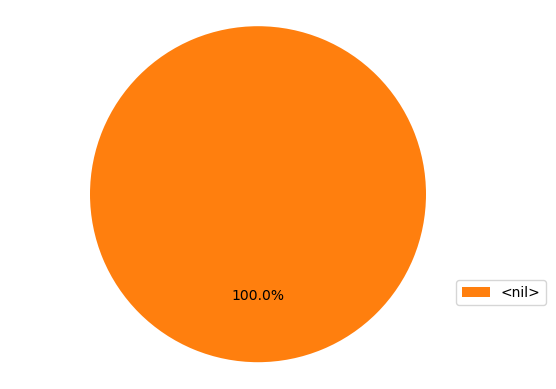

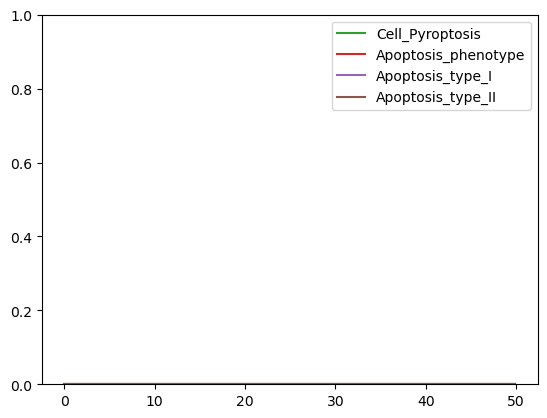

In [6]:
res1 = model.run()
res1.plot_piechart()
res1.plot_node_trajectory()

### Virus simulation

In [7]:
model_virus = model.copy()
model_virus.network.set_istate(
    'Virus_inside', [0, 1]
)

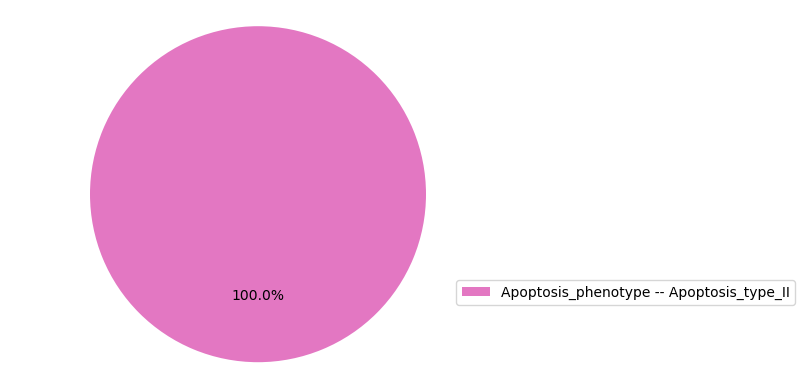

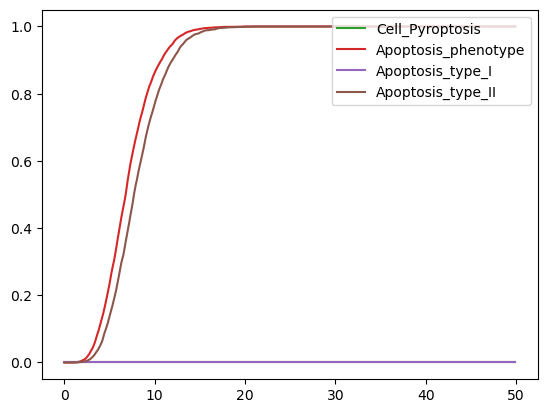

In [8]:
res_virus = model_virus.run()
res_virus.plot_piechart()
res_virus.plot_node_trajectory()

### CD8 simulation

In [9]:
model_cd8 = model.copy()
model_cd8.network.set_istate('TCell_attached', [0, 1])

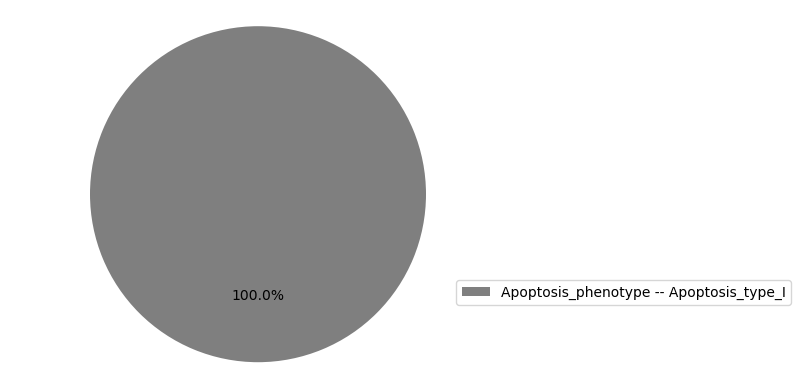

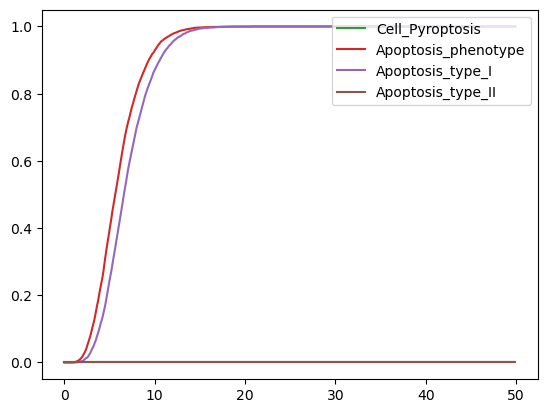

In [10]:
res_cd8 = model_cd8.run()
res_cd8.plot_piechart()
res_cd8.plot_node_trajectory()

### Virus + CD8 simulation

In [11]:
model_both = model.copy()
model_both.network.set_istate('Virus_inside', [0, 1])
model_both.network.set_istate('TCell_attached', [0, 1])

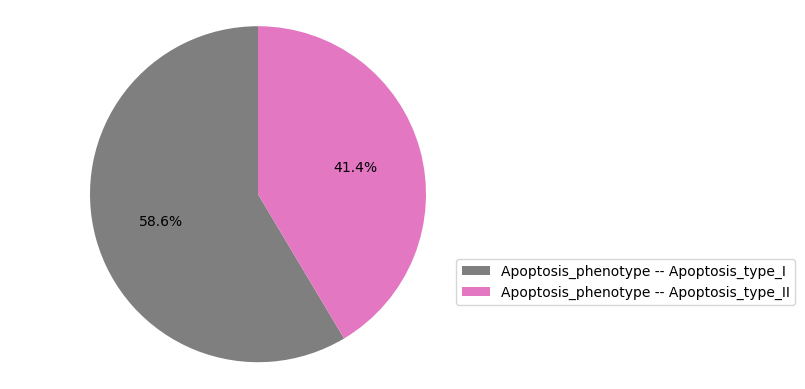

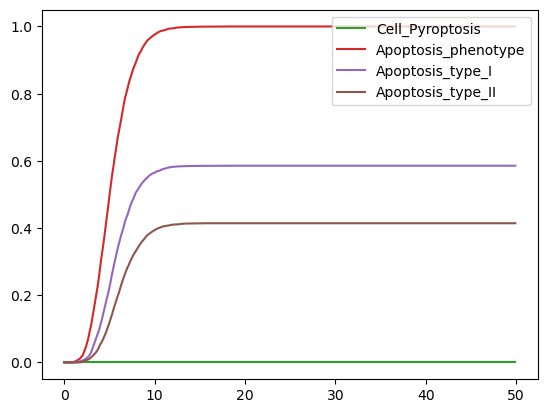

In [12]:
res_both = model_both.run()
res_both.plot_piechart()
res_both.plot_node_trajectory()

### M mutant

In [13]:
model_m_mutant = model_virus.copy()
# model_m_mutant.mutate('M', 'OFF')
model_m_mutant.param['$M_ko'] = 1

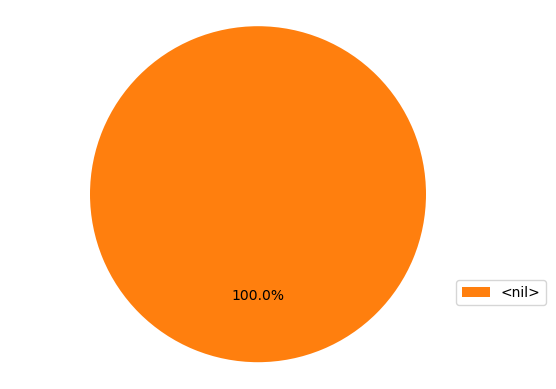

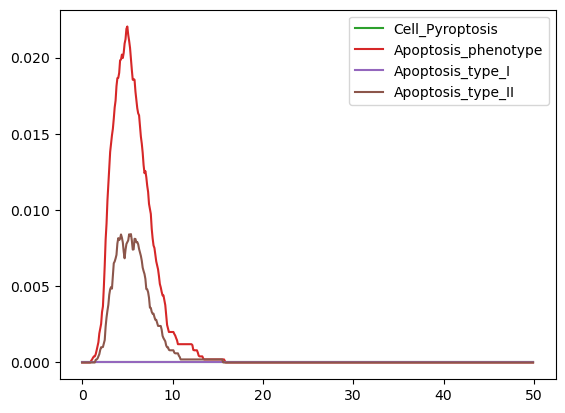

In [14]:
res_m_mutant = model_m_mutant.run()
res_m_mutant.plot_piechart()
res_m_mutant.plot_node_trajectory()

### FADD mutant

In [15]:
model_fadd_mutant = model_cd8.copy()
model_fadd_mutant.param['$FADD_ko'] = 1

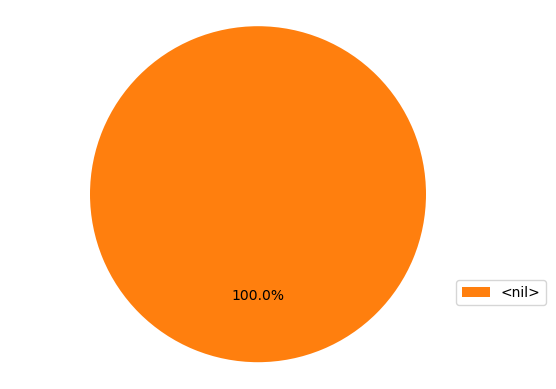

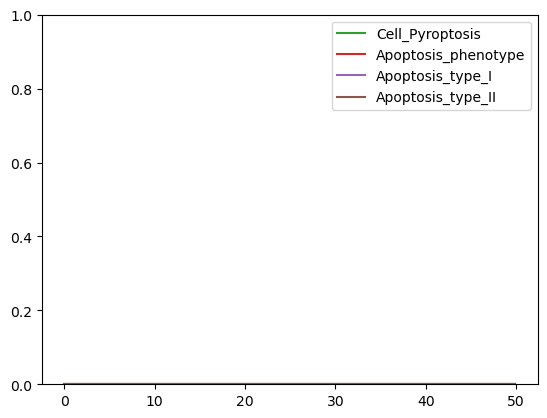

In [16]:
res_fadd_mutant = model_fadd_mutant.run()
res_fadd_mutant.plot_piechart()
res_fadd_mutant.plot_node_trajectory()

# Finding more mutants


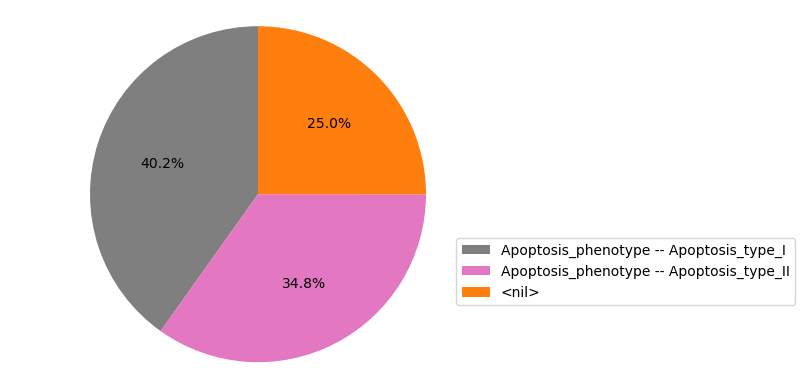

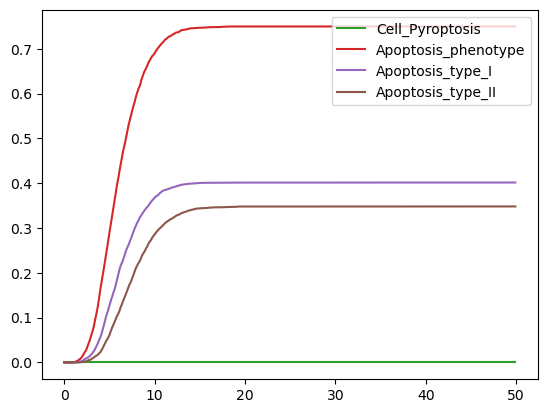

In [17]:
# mutant_simulation = maboss.copy_and_mutate(model, ["Apoptosome_complex"], "OFF")
mutant_simulation = model.copy()
mutant_simulation.network.set_istate( 'Virus_inside', [0.5, 0.5])
mutant_simulation.network.set_istate('TCell_attached', [0.5, 0.5])
# mutant_simulation.mutate("MOMP", "OFF")
# mutant_simulation.mutate("MAPK14", "OFF")
# mutant_simulation.network['CYCS'].is_internal = False
# mutant_simulation.network['MOMP'].is_internal = False
# mutant_simulation.network['MAPK14'].is_internal = False
# mutant_simulation.network['CASP9_cell_active'].is_internal = False
# mutant_simulation.network['Apoptosome_complex'].is_internal = False

mutant_res = mutant_simulation.run()
mutant_res.plot_piechart()
mutant_res.plot_node_trajectory()

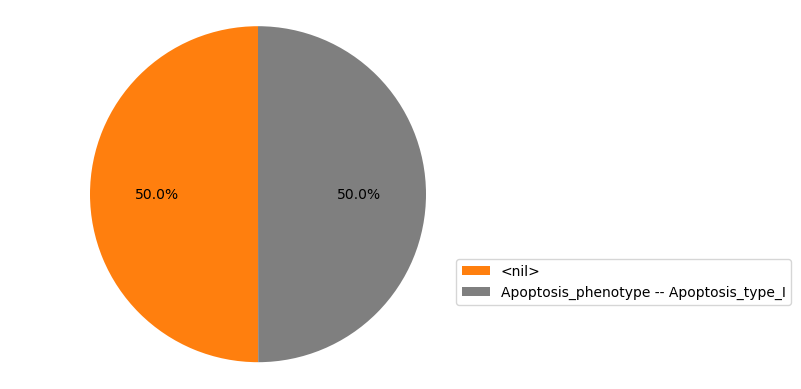

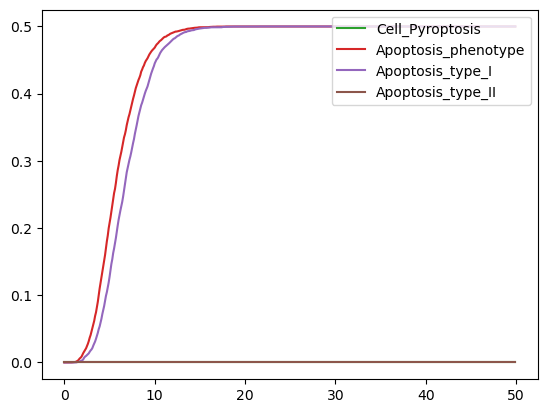

In [18]:
mutant_simulation = maboss.copy_and_mutate(model, ["Apoptosome_complex"], "OFF")
# mutant_simulation = model.copy()
mutant_simulation.network.set_istate( 'Virus_inside', [0.5, 0.5])
mutant_simulation.network.set_istate('TCell_attached', [0.5, 0.5])
mutant_res = mutant_simulation.run()
mutant_res.plot_piechart()
mutant_res.plot_node_trajectory()

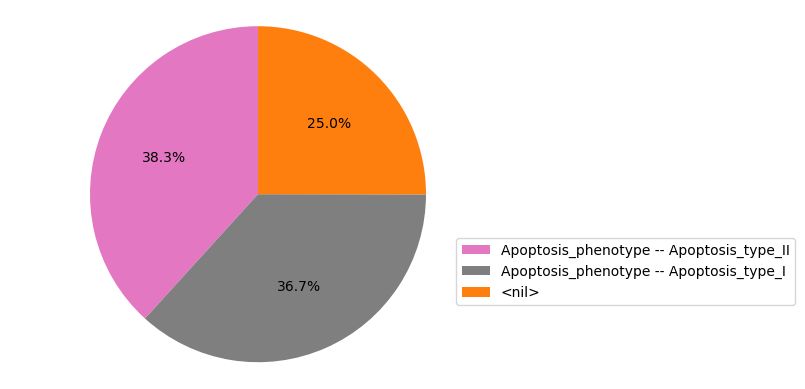

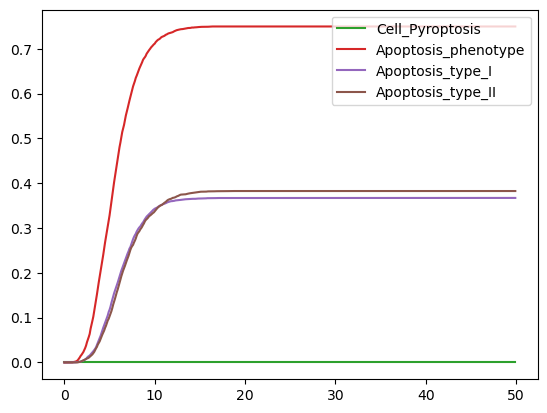

In [19]:
mutant_simulation = maboss.copy_and_mutate(model, ["AKT1"], "OFF")
# mutant_simulation = model.copy()
mutant_simulation.network.set_istate( 'Virus_inside', [0.5, 0.5])
mutant_simulation.network.set_istate('TCell_attached', [0.5, 0.5])
mutant_res = mutant_simulation.run()
mutant_res.plot_piechart()
mutant_res.plot_node_trajectory()

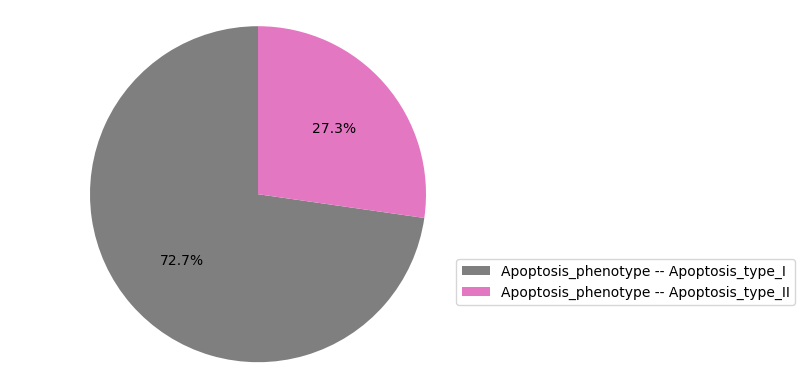

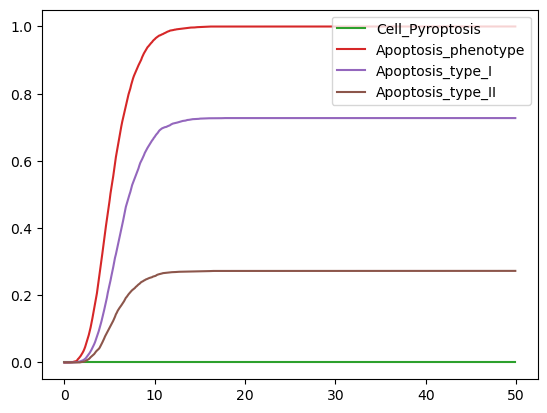

In [ ]:
mutant_simulation = maboss.copy_and_mutate(model, ["AKT1"], "OFF")
# mutant_simulation = model.copy()
# mutant_simulation.network.set_istate('Virus_inside', [0, 1])
# mutant_simulation.network.set_istate('TCell_attached', [1, 0])
mutant_simulation.network.set_istate('Virus_inside', [0.5, 0.5])
mutant_simulation.network.set_istate('TCell_attached', [0, 1])
mutant_res = mutant_simulation.run()
mutant_res.plot_piechart()
mutant_res.plot_node_trajectory()
# type 1 igual, 7% més type 2

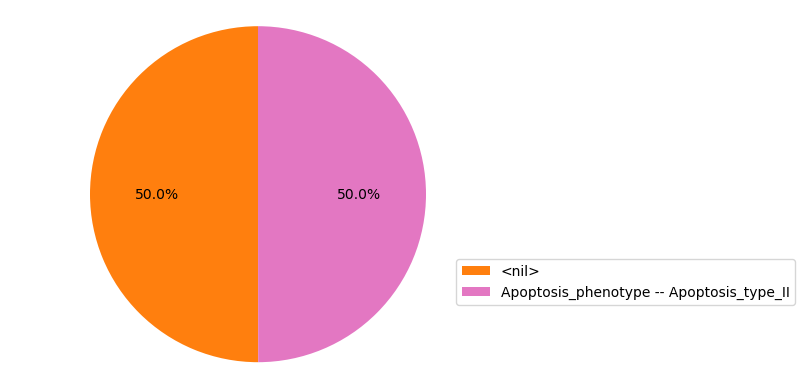

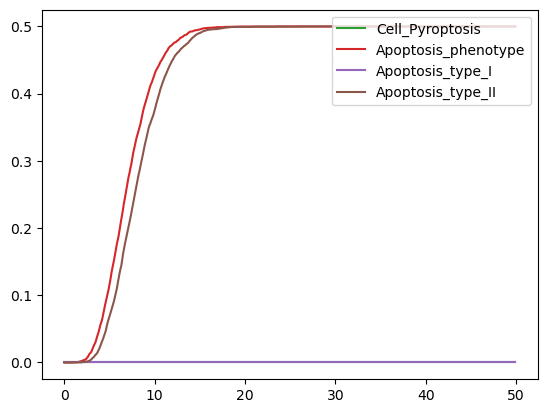

In [40]:
mutant_simulation = maboss.copy_and_mutate(model, ["FADD"], "OFF")
# mutant_simulation = model.copy()
mutant_simulation.network.set_istate('Virus_inside', [0.5, 0.5])
mutant_simulation.network.set_istate('TCell_attached', [0, 1])
mutant_res = mutant_simulation.run()
mutant_res.plot_piechart()
mutant_res.plot_node_trajectory()
# 25% més type 2, res de type 1